In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = r'C:\Users\jerom\Machine Learning\Lab Ex 1\House_Rent_Dataset.csv'
data = pd.read_csv(csv_file)
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


# Preprocessing

#### Dropping Irrelevant Features

In [3]:
data = data.drop('Posted On', axis=1)
data = data.drop('Area Locality', axis=1)
data = data.drop('Point of Contact', axis=1)


print("\nAfter dropping 'Posted On' column:")
print(data)


After dropping 'Posted On' column:
      BHK   Rent  Size            Floor    Area Type       City  \
0       2  10000  1100  Ground out of 2   Super Area    Kolkata   
1       2  20000   800       1 out of 3   Super Area    Kolkata   
2       2  17000  1000       1 out of 3   Super Area    Kolkata   
3       2  10000   800       1 out of 2   Super Area    Kolkata   
4       2   7500   850       1 out of 2  Carpet Area    Kolkata   
...   ...    ...   ...              ...          ...        ...   
4741    2  15000  1000       3 out of 5  Carpet Area  Hyderabad   
4742    3  29000  2000       1 out of 4   Super Area  Hyderabad   
4743    3  35000  1750       3 out of 5  Carpet Area  Hyderabad   
4744    3  45000  1500     23 out of 34  Carpet Area  Hyderabad   
4745    2  15000  1000       4 out of 5  Carpet Area  Hyderabad   

     Furnishing Status  Tenant Preferred  Bathroom  
0          Unfurnished  Bachelors/Family         2  
1       Semi-Furnished  Bachelors/Family         1  


#### Fixing Floors Format

In [4]:
data.at[105, 'Floor'] = '5 out of 8'
data.at[161, 'Floor'] = '1 out of 2'

In [5]:
data.iloc[105]

BHK                                 1
Rent                             6000
Size                              600
Floor                      5 out of 8
Area Type                 Carpet Area
City                          Kolkata
Furnishing Status         Unfurnished
Tenant Preferred     Bachelors/Family
Bathroom                            1
Name: 105, dtype: object

In [6]:
data.iloc[161]

BHK                                 2
Rent                            10000
Size                              450
Floor                      1 out of 2
Area Type                 Carpet Area
City                          Kolkata
Furnishing Status      Semi-Furnished
Tenant Preferred     Bachelors/Family
Bathroom                            2
Name: 161, dtype: object

In [7]:
for index, floor_value in enumerate(data["Floor"]):
    if "Upper Basement" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Upper Basement", "-1")
    elif "Lower Basement" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Lower Basement", "-2")
    elif "Ground out" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Ground", "1")
    elif floor_value == "Ground":
        data.at[index, 'Floor'] = floor_value.replace("Ground", "1 out of 1")
    elif floor_value == "1":
        data.at[index, 'Floor'] = floor_value.replace("1", "1 out of 1")
    elif floor_value == "3":
         data.at[index, 'Floor'] = floor_value.replace("3", "3 out of 3")
    else:
        data.at[index, 'Floor'] = floor_value
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2


In [8]:
pattern = r'^-?\d+ out of \d+$'

matches_pattern = data['Floor'].str.match(pattern)
records_not_following_pattern = data[~matches_pattern]

# Print all unique values of 'Floor' for records that don't follow the pattern
unique_values_not_following_pattern = records_not_following_pattern['Floor'].unique()
print(unique_values_not_following_pattern)

[]


In [9]:
data['Floor'].value_counts()

Floor
1 out of 2      730
1 out of 3      502
1 out of 1      332
1 out of 4      315
2 out of 3      312
               ... 
5 out of 21       1
32 out of 59      1
20 out of 32      1
10 out of 37      1
23 out of 34      1
Name: count, Length: 460, dtype: int64

In [10]:
# Define a function to perform the conversion
def convert_floor(row):
    # Split the string into two parts based on "out of"
    numbers = row.split(" out of ")
    
    # Convert the two parts to integers
    room_floor = int(numbers[0])
    total_floor = int(numbers[1])
    
    # Perform the division and convert to a double
    floor = round(room_floor / total_floor, 4)
    
    return floor

# Apply the function to the entire 'Floor' column
data['Floor'] = data['Floor'].apply(convert_floor)

# Print the updated DataFrame
print(data)

      BHK   Rent  Size   Floor    Area Type       City Furnishing Status  \
0       2  10000  1100  0.5000   Super Area    Kolkata       Unfurnished   
1       2  20000   800  0.3333   Super Area    Kolkata    Semi-Furnished   
2       2  17000  1000  0.3333   Super Area    Kolkata    Semi-Furnished   
3       2  10000   800  0.5000   Super Area    Kolkata       Unfurnished   
4       2   7500   850  0.5000  Carpet Area    Kolkata       Unfurnished   
...   ...    ...   ...     ...          ...        ...               ...   
4741    2  15000  1000  0.6000  Carpet Area  Hyderabad    Semi-Furnished   
4742    3  29000  2000  0.2500   Super Area  Hyderabad    Semi-Furnished   
4743    3  35000  1750  0.6000  Carpet Area  Hyderabad    Semi-Furnished   
4744    3  45000  1500  0.6765  Carpet Area  Hyderabad    Semi-Furnished   
4745    2  15000  1000  0.8000  Carpet Area  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom  
0     Bachelors/Family         2  
1     Bachelors/F

In [11]:
data['Floor'].describe()

count    4746.000000
mean        0.555319
std         0.270375
min        -2.000000
25%         0.333300
50%         0.500000
75%         0.750000
max         1.000000
Name: Floor, dtype: float64

In [12]:
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,0.5000,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,0.2500,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,0.6765,Carpet Area,Hyderabad,Semi-Furnished,Family,2


#### Removal of Outliers in Rent Using IQR

In [13]:
def outliers(data, ft):
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1

    lower_bnd = q1 - 1.5 * iqr  
    upper_bnd = q3 + 1.5 * iqr  
    ls = data.index[(data[ft] < lower_bnd) | (data[ft] > upper_bnd)]  # Corrected variable names
    return ls

index_list = []
for feature in ['Rent']:
    index_list.extend(outliers(data, feature))

num_outliers = len(index_list)
print("Number of outliers:", num_outliers)

Number of outliers: 520


In [14]:
def remove (data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data
    
data = remove(data, index_list)
data.shape

(4226, 9)

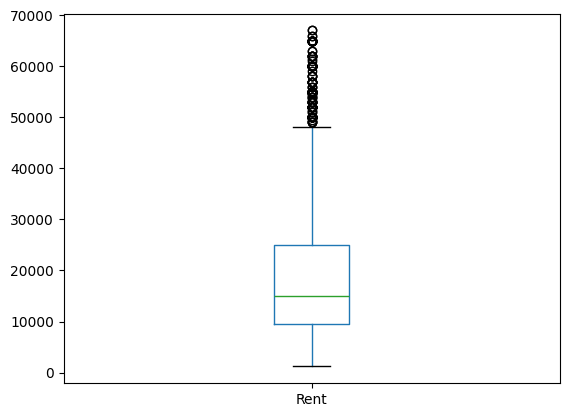

In [15]:
#Outlier Detection Using Boxplot
def plot_boxplot(data,ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(data, "Rent")

#### One-hot Encoding of Categorical Features

In [16]:
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,0.5000,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,0.2500,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,0.6765,Carpet Area,Hyderabad,Semi-Furnished,Family,2


In [17]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [18]:
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Tenant Preferred')

In [19]:
data

,BHK,Rent,Size,Floor,Bathroom,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family
0,2,10000,1100,0.5000,2,False,True,False,True,False,False,False,True,False,True,False
1,2,20000,800,0.3333,1,True,False,False,True,False,False,False,True,False,True,False
2,2,17000,1000,0.3333,1,True,False,False,True,False,False,False,True,False,True,False
3,2,10000,800,0.5000,1,False,True,False,True,False,False,False,True,False,True,False
4,2,7500,850,0.5000,1,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,2,True,False,True,False,False,False,True,False,False,True,False
4742,3,29000,2000,0.2500,3,True,False,False,True,False,False,True,False,False,True,False
4743,3,35000,1750,0.6000,3,True,False,True,False,False,False,True,False,False,True,False
4744,3,45000,1500,0.6765,2,True,False,True,False,False,False,True,False,False,False,True


### Training and Test Split

In [20]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [21]:
X

,BHK,Size,Floor,Bathroom,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family
0,2,1100,0.5000,2,False,True,False,True,False,False,False,True,False,True,False
1,2,800,0.3333,1,True,False,False,True,False,False,False,True,False,True,False
2,2,1000,0.3333,1,True,False,False,True,False,False,False,True,False,True,False
3,2,800,0.5000,1,False,True,False,True,False,False,False,True,False,True,False
4,2,850,0.5000,1,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,0.6000,2,True,False,True,False,False,False,True,False,False,True,False
4742,3,2000,0.2500,3,True,False,False,True,False,False,True,False,False,True,False
4743,3,1750,0.6000,3,True,False,True,False,False,False,True,False,False,True,False
4744,3,1500,0.6765,2,True,False,True,False,False,False,True,False,False,False,True


In [22]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4226, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

#### Linear Reg

In [25]:
from sklearn import linear_model

# Assuming X_train is your training feature matrix and y_train is the corresponding target variable

# Create and fit the linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
model_coefficients = model.coef_

# Print the coefficients along with feature index
for idx, coef in enumerate(model_coefficients):
    print(f"Feature {idx}: {coef}")


Feature 0: 2315.074046871237
Feature 1: 4368.552413444124
Feature 2: -482.4827238197912
Feature 3: 2191.707576650376
Feature 4: -1683.6156545277568
Feature 5: -2335.119493934502
Feature 6: -557.4246547299875
Feature 7: -2108.2226331037446
Feature 8: -615.151772667172
Feature 9: 1167.4366027132403
Feature 10: -1140.6509489642795
Feature 11: -1071.968519160415
Feature 12: 7749.020598490934
Feature 13: -621.5798088300361
Feature 14: -777.842745040181


In [26]:
model.score(X_test, y_test)

0.6511865988484764

In [27]:
model.score(X_train, y_train)

0.6456930144089195

### Regularization

#### Linear Reg Lasso

In [28]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.coef_

# Get the coefficients
lasso_reg_coefficients = lasso_reg.coef_

# Print the coefficients along with feature index
for idx, coef in enumerate(lasso_reg_coefficients):
    print(f"Feature {idx}: {coef}")

Feature 0: 2753.2352726135837
Feature 1: 4356.67000800002
Feature 2: -404.81484212535645
Feature 3: 1835.7608924722954
Feature 4: -1440.9903786153309
Feature 5: -2052.6773260927357
Feature 6: 1522.0124323764512
Feature 7: -14.332864653577778
Feature 8: -770.7403366813786
Feature 9: 986.5130568202261
Feature 10: -1227.4680210668707
Feature 11: -1188.8219161027323
Feature 12: 7703.2247514918145
Feature 13: -508.62397836529783
Feature 14: -667.3220709924376


In [29]:
lasso_reg.score(X_test, y_test)

0.6495981721472621

In [30]:
lasso_reg.score(X_train, y_train)

0.6448749734460784

#### Ridge

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)


# Get the coefficients
ridge_reg_coefficients = ridge_reg.coef_

# Print the coefficients along with feature index
for idx, coef in enumerate(ridge_reg_coefficients):
    print(f"Feature {idx}: {coef}")

Feature 0: 2291.302060621677
Feature 1: 4227.223412129562
Feature 2: -485.8225157359739
Feature 3: 2263.256903205767
Feature 4: -1582.1633878447847
Feature 5: -2224.8270952366483
Feature 6: 745.4261257788688
Feature 7: -842.2317919621382
Feature 8: -669.7611827125498
Feature 9: 1085.5381286495756
Feature 10: -1167.6842446552205
Feature 11: -1107.8731858954684
Feature 12: 7558.40297923957
Feature 13: -600.1544742587247
Feature 14: -735.0069282337612


In [32]:
ridge_reg.score(X_test, y_test)

0.6519556979457597

In [33]:
ridge_reg.score(X_train, y_train)

0.6455027588589464

#### Plotting Coefficients for each model

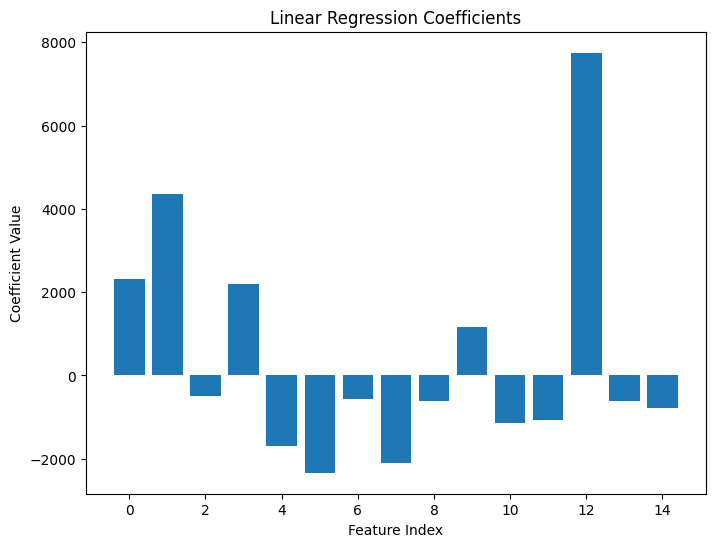

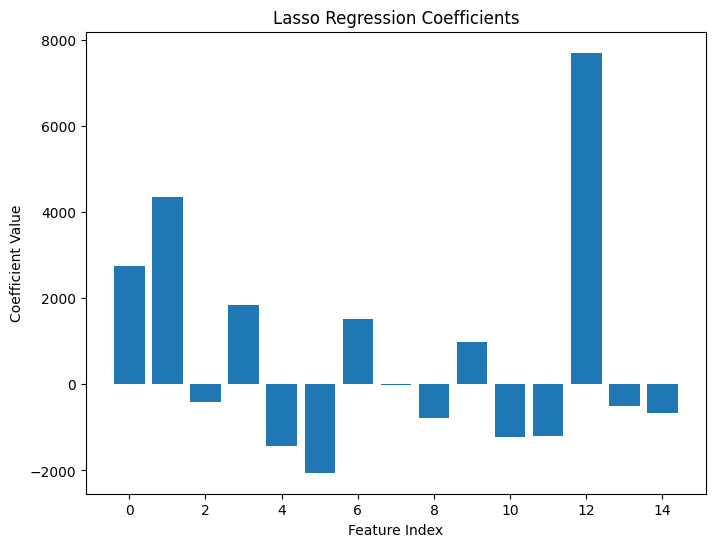

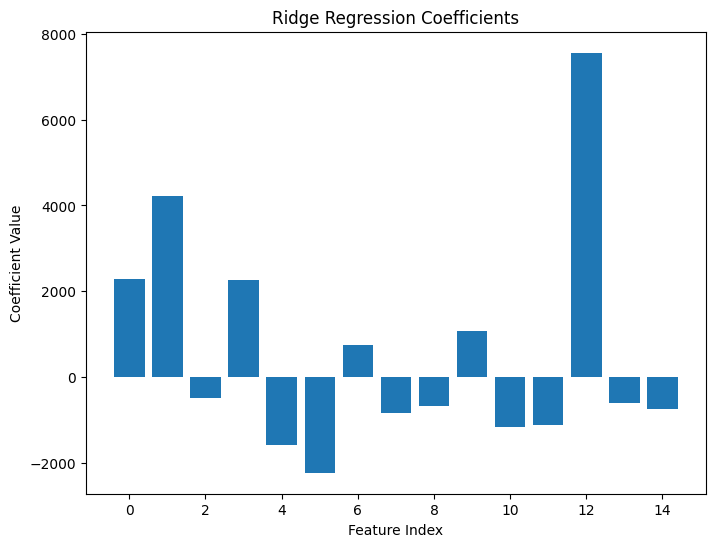

In [34]:
# Plot the Linear Reg coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(model_coefficients)), model_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

# Plot the Lasso coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(lasso_reg_coefficients)), lasso_reg_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()

# Plot the Ridge coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(ridge_reg_coefficients)), ridge_reg_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


### Evaluation

#### Quantitative Evaluation For Lin Reg

In [35]:
y_preds = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Results when Area Localization is excluded in features")
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Results when Area Localization is excluded in features
Coefficients: 
 [ 2315.07404687  4368.55241344  -482.48272382  2191.70757665
 -1683.61565453 -2335.11949393  -557.42465473 -2108.2226331
  -615.15177267  1167.43660271 -1140.65094896 -1071.96851916
  7749.02059849  -621.57980883  -777.84274504]
Mean squared error: 66882004.98
Coefficient of determination: 0.65


#### Quantitative Evaluation For lasso

In [36]:
y_preds = lasso_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", lasso_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 2753.23527261  4356.670008    -404.81484213  1835.76089247
 -1440.99037862 -2052.67732609  1522.01243238   -14.33286465
  -770.74033668   986.51305682 -1227.46802107 -1188.8219161
  7703.22475149  -508.62397837  -667.32207099]
Mean squared error: 67186572.30
Coefficient of determination: 0.65


#### Quantitative Evaluation For ridge

In [37]:
y_preds = ridge_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", ridge_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 2291.30206062  4227.22341213  -485.82251574  2263.25690321
 -1582.16338784 -2224.82709524   745.42612578  -842.23179196
  -669.76118271  1085.53812865 -1167.68424466 -1107.8731859
  7558.40297924  -600.15447426  -735.00692823]
Mean squared error: 66734536.77
Coefficient of determination: 0.65


## Qualitative Evaluation

In [38]:
sample_data = X.iloc[0]
sample_data

BHK                     2
Size                 1100
Floor                 0.5
Bathroom                2
Semi-Furnished      False
Unfurnished          True
Carpet Area         False
Super Area           True
Chennai             False
Delhi               False
Hyderabad           False
Kolkata              True
Mumbai              False
Bachelors/Family     True
Family              False
Name: 0, dtype: object

In [39]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

C:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

13813.86773622294

In [41]:
y.iloc[0]

10000